In [1]:
print("test : start")

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
from torchvision import transforms
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, mean_squared_error

# my modules :
from custom_data_set_class import CustomDataset
import custom_vae_module
from custom_vae_module import train_modular_vae
import custom_vae_module_with_yhat 
from custom_vae_module_with_yhat import train_modular_vae_with_yhat
import my_mlp_module 


# Initialize model and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('Using device:', device)
print('GPU:', torch.cuda.get_device_name(0))







test : start
Using device: cuda
GPU: NVIDIA GeForce RTX 3060


In [2]:
# Set up data loaders 
batch_size = 128

use_rhc_data = False
if use_rhc_data :
    csv_file_path = "rhc_preprocessed.csv" # all columns need to be numeric at that point.
    full_dataset = CustomDataset(csv_file_path, do_fillna=True)
    train_dataset, test_dataset = train_test_split(full_dataset, test_size=0.2, random_state=42)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    input_dim = 122
    hidden_dim = 65
    latent_dim = 15
    num_labels = 2
else : 
    transform = transforms.Compose([transforms.ToTensor()])
    train_dataset = datasets.MNIST(root="./data", train=True, transform=transform, download=True)
    test_dataset = datasets.MNIST(root="./data", train=False, transform=transform, download=True)
    input_dim=784
    hidden_dim=300
    latent_dim=10
    num_labels=10

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


use_model_with_yhat = False
if use_model_with_yhat : 
    model = custom_vae_module_with_yhat.ModularVAEWithYHat(input_dim, hidden_dim, latent_dim, num_labels, debug_mode = False).to(device)
    train_my_model = train_modular_vae_with_yhat    
else : 
    model = custom_vae_module.ModularVAE(input_dim, hidden_dim, latent_dim, num_labels, debug_mode = False).to(device)
    train_my_model = train_modular_vae



p_input_dim = input_dim
p_hidden_dim = 120
p_num_labels = num_labels

my_mlp_from_x = my_mlp_module.MyMLP(input_dim = p_input_dim,  num_labels = p_num_labels ).to(device)
my_mlp_from_z = my_mlp_module.MyMLPFromLatentSpace(model, input_dim = p_input_dim,  num_labels = p_num_labels , z_dim=latent_dim).to(device)




optimizer = optim.Adam(model.parameters(), lr=1e-3)
mlp_optimizer_1 = optim.Adam(my_mlp_from_x.parameters(), lr=1e-3)
mlp_optimizer_z = optim.Adam(my_mlp_from_z.parameters(), lr=1e-3)




In [3]:

# Run training
epochs_main = 50
beta = 1 
for epoch in range(1, epochs_main + 1):
    train_my_model(model, train_loader, optimizer, epoch, beta, device)

# Save trained model
torch.save(model.state_dict(), 'vae_model_with_custom_loss.pth')
torch.save(model, 'beta_vae_model.pth')



====> Epoch: 1 Average loss: 44.3029657796224
====> Epoch: 2 Average loss: 32.75149049479167
====> Epoch: 3 Average loss: 30.917134025065103
====> Epoch: 4 Average loss: 29.94239003092448
====> Epoch: 5 Average loss: 29.25592264811198
====> Epoch: 6 Average loss: 28.784832853190103
====> Epoch: 7 Average loss: 28.380687520345052
====> Epoch: 8 Average loss: 28.110269685872396
====> Epoch: 9 Average loss: 27.879476883951824
====> Epoch: 10 Average loss: 27.692205249023438
====> Epoch: 11 Average loss: 27.504765856933595
====> Epoch: 12 Average loss: 27.363344795735678
====> Epoch: 13 Average loss: 27.23871006673177
====> Epoch: 14 Average loss: 27.121190649414064
====> Epoch: 15 Average loss: 27.003873352050782
====> Epoch: 16 Average loss: 26.94264547932943
====> Epoch: 17 Average loss: 26.870927604166667
====> Epoch: 18 Average loss: 26.776848327636717
====> Epoch: 19 Average loss: 26.723350174967447
====> Epoch: 20 Average loss: 26.664193819173178
====> Epoch: 21 Average loss: 26.591

In [4]:

# Run training
epochs_mlp_1 = 20
beta = 1 
for epoch in range(1, epochs_mlp_1 + 1):
    my_mlp_from_x.train_myself(train_loader, mlp_optimizer_1, epoch,  device)




====> Epoch: 1 Average loss: 0.0026038405789683265
====> Epoch: 2 Average loss: 0.001081596751511097
====> Epoch: 3 Average loss: 0.0007129103180486709
====> Epoch: 4 Average loss: 0.0005242658252362162
====> Epoch: 5 Average loss: 0.0003916715833048026
====> Epoch: 6 Average loss: 0.0003060256991923476
====> Epoch: 7 Average loss: 0.00023236453636394194
====> Epoch: 8 Average loss: 0.00017787049792241305
====> Epoch: 9 Average loss: 0.00013686733721600224
====> Epoch: 10 Average loss: 0.00010656199979130179
====> Epoch: 11 Average loss: 8.710714701446705e-05
====> Epoch: 12 Average loss: 7.171888598725976e-05
====> Epoch: 13 Average loss: 5.526086665049661e-05
====> Epoch: 14 Average loss: 4.74082966131391e-05
====> Epoch: 15 Average loss: 3.381610758709333e-05
====> Epoch: 16 Average loss: 4.801112780890738e-05
====> Epoch: 17 Average loss: 4.541870199488282e-05
====> Epoch: 18 Average loss: 1.8636670926207443e-05
====> Epoch: 19 Average loss: 6.948488977529147e-06
====> Epoch: 20 Av

In [5]:



# Run training
epochs_mlp_z = 20
beta = 1 
for epoch in range(1, epochs_mlp_z + 1):
    my_mlp_from_z.train_myself(train_loader, optimizer =  mlp_optimizer_1, epoch = epoch, device = device)





====> Epoch: 1 Average loss: 0.01799553252061208
====> Epoch: 2 Average loss: 0.01799535853068034
====> Epoch: 3 Average loss: 0.017995671713352205
====> Epoch: 4 Average loss: 0.01799514531691869
====> Epoch: 5 Average loss: 0.017995608520507814
====> Epoch: 6 Average loss: 0.017994524069627125
====> Epoch: 7 Average loss: 0.017994767618179322
====> Epoch: 8 Average loss: 0.01799535903930664
====> Epoch: 9 Average loss: 0.017995014123121898
====> Epoch: 10 Average loss: 0.017994966940085094
====> Epoch: 11 Average loss: 0.017995028416315714
====> Epoch: 12 Average loss: 0.01799441419442495
====> Epoch: 13 Average loss: 0.017994992307821908
====> Epoch: 14 Average loss: 0.017995308645566303
====> Epoch: 15 Average loss: 0.017996103517214458
====> Epoch: 16 Average loss: 0.01799531391064326
====> Epoch: 17 Average loss: 0.017994798747698465
====> Epoch: 18 Average loss: 0.017995005389054616
====> Epoch: 19 Average loss: 0.01799539540608724
====> Epoch: 20 Average loss: 0.017995916561285

In [6]:
mlp_evaluation = my_mlp_from_x.evaluation(test_loader, device)

Accuracy: 0.9775
Precision: 0.9780
Recall: 0.9775
F1 Score: 0.9775
Confusion Matrix:
[[ 970    0    0    2    0    0    4    0    2    2]
 [   0 1124    3    1    0    1    2    1    3    0]
 [   3    2 1012    3    2    0    2    3    4    1]
 [   0    0    2  995    0    2    0    1    0   10]
 [   1    0    2    0  964    0    1    0    0   14]
 [   2    0    0    5    1  874    4    0    5    1]
 [   4    2    2    1    4    3  941    0    1    0]
 [   0    6   16    5    4    0    0  945    3   49]
 [   1    0    3    3    3    4    0    0  955    5]
 [   0    2    0    2    6    3    0    0    1  995]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98   

In [7]:
mlp_z_evaluation = my_mlp_from_z.evaluation(test_loader, device)




Accuracy: 0.1027
Precision: 0.0639
Recall: 0.1027
F1 Score: 0.0546
Confusion Matrix:
[[  0 385  35   0   1   0  50 479   0  30]
 [  0 372  39   0  17   0  80 598   0  29]
 [  0 525  42   0  13   0  64 373   0  15]
 [  0 393  40   0  17   0  67 479   0  14]
 [  0 375  17   0  11   0 141 416   0  22]
 [  0 337   7   0  23   0  73 426   0  26]
 [  1 337  21   0   6   0  68 510   0  15]
 [  0 321  12   0  17   0 117 515   0  46]
 [  0 405  19   0  28   0  74 425   0  23]
 [  0 334   4   0  17   0  75 560   0  19]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.10      0.33      0.15      1135
           2       0.18      0.04      0.07      1032
           3       0.00      0.00      0.00      1010
           4       0.07      0.01      0.02       982
           5       0.00      0.00      0.00       892
           6       0.08      0.07      0.08       958
           7       0.11     

/home/paulm/Bureau/codes/rhc_dataset/my_venv2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/paulm/Bureau/codes/rhc_dataset/my_venv2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/paulm/Bureau/codes/rhc_dataset/my_venv2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [8]:

all_x = []
all_y = []
all_x_hat = []
model.eval()

with torch.no_grad():
    for data, label in test_loader:
        data, label = data.to(device), label.to(device)
        x_hat, _ , _, _ = model(data, label)
        all_y.extend(label.cpu().numpy())
        all_x.extend(data.cpu().numpy())
        all_x_hat.extend(x_hat.cpu().numpy())

all_x = np.array(all_x)
all_y = np.array(all_y)
all_x_hat = np.array(all_x_hat)


In [9]:
all_x_hat.shape


(10000, 784)

In [10]:
my_mlp_from_x.eval()

with torch.no_grad():
    test = torch.from_numpy(all_x_hat).to(device)
    # test.detach().numpy()

    all_y_hat = my_mlp_from_x.forward(test)


    all_y_hat = torch.argmax(all_y_hat, dim=1).cpu().detach().numpy()
    accuracy = accuracy_score(all_y, all_y_hat)

    print(f"Accuracy: {accuracy}")


    precision = precision_score(all_y, all_y_hat, average='weighted')
    recall = recall_score(all_y, all_y_hat, average='weighted')
    f1 = f1_score(all_y, all_y_hat, average='weighted')

    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')

    # Confusion Matrix
    conf_matrix = confusion_matrix(all_y, all_y_hat)
    print('Confusion Matrix:')
    print(conf_matrix)





Accuracy: 0.996
Precision: 0.9961
Recall: 0.9960
F1 Score: 0.9960
Confusion Matrix:
[[ 980    0    0    0    0    0    0    0    0    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   0    0 1030    1    0    0    0    1    0    0]
 [   0    0    0 1010    0    0    0    0    0    0]
 [   0    0    0    0  981    0    0    0    0    1]
 [   0    0    0    1    0  891    0    0    0    0]
 [   0    0    0    0    0    0  958    0    0    0]
 [   0    0    0    0    0    0    0  992    0   36]
 [   0    0    0    0    0    0    0    0  974    0]
 [   0    0    0    0    0    0    0    0    0 1009]]


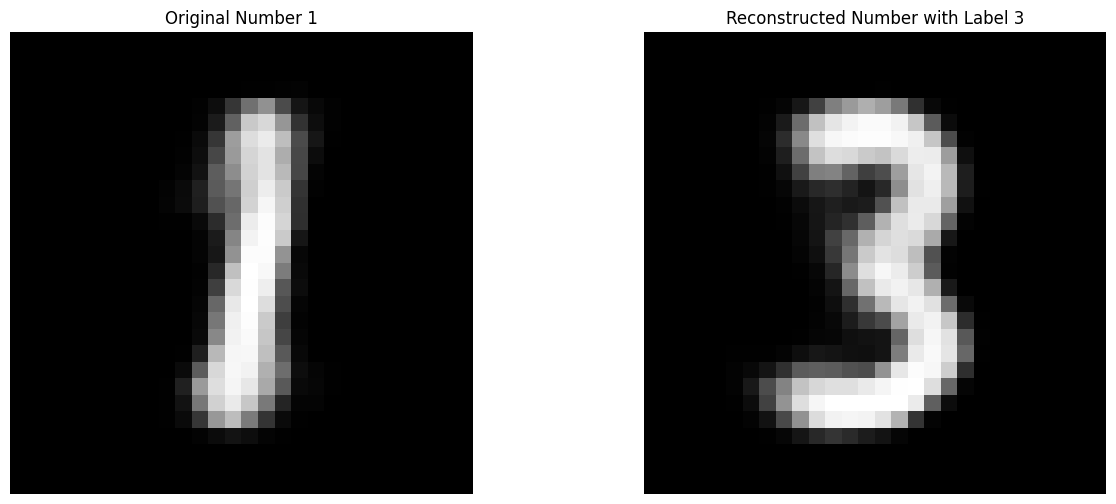

test : end


In [11]:

######################################  Only for  MNIST data :



if not use_rhc_data : 
    # Visualize reconstructed images and added pixels
    model.eval()
    original_label = 1
    target_label = 3
    original_label_tensor = torch.tensor([original_label]).to(device)
    target_label_tensor = torch.tensor([target_label]).to(device)
    latent_dim = model.fc2_mean.out_features  # Assuming latent_dim is defined by fc2_mean's output size
    latent_sample = torch.randn(1, latent_dim).to(device)
    original_label_onehot = F.one_hot(original_label_tensor, num_classes=10).float()
    target_label_onehot = F.one_hot(target_label_tensor, num_classes=10).float()
    combined_input_original = torch.cat((latent_sample, original_label_onehot), dim=1)
    with torch.no_grad():
        reconstructed_image_original = model.decode(combined_input_original).view(28, 28).cpu().numpy()
    combined_input_target = torch.cat((latent_sample, target_label_onehot), dim=1)
    with torch.no_grad():
        reconstructed_image_target = model.decode(combined_input_target).view(28, 28).cpu().numpy()
    pixel_difference = reconstructed_image_target - reconstructed_image_original

    # Display images
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    ax1.imshow(reconstructed_image_original, cmap='gray')
    ax1.axis('off')
    ax1.set_title(f"Original Number {original_label}")
    ax2.imshow(reconstructed_image_target, cmap='gray')
    ax2.axis('off')
    ax2.set_title(f"Reconstructed Number with Label {target_label}")
    #ax3.imshow(reconstructed_image_target, cmap='gray')
    #ax3.imshow(pixel_difference, cmap='Reds', alpha=0.5, vmin=0, vmax=np.max(pixel_difference))
    #ax3.axis('off')
    #ax3.set_title(f"Added Pixels (in red)")
    plt.show()


    print("test : end")